# Correlazione

In [40]:
import numpy as np

from scipy import signal

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 14

Definizioni:
- **N**  : numero di campioni
- **dt** : intervallo di campionamento
- **T0** : periodo del segnale

In [41]:
dt = 1/2000.
T0 = 0.1
N = int(T0/dt + 1)

periodo del segnale

In [42]:
t = np.linspace(0,T0, num=N)

Definizione delle funzioni *impulso*

In [43]:
f1 = lambda t : 5.* (t>=0.02) * (t<0.03)
f2 = lambda t : 5.* (t>=0.06) * (t<0.07)

Definizione della correlazione tra i segnali

In [44]:
correl = np.correlate( f2(t),f1(t),mode='full')
maxcorr = np.argmax(correl)

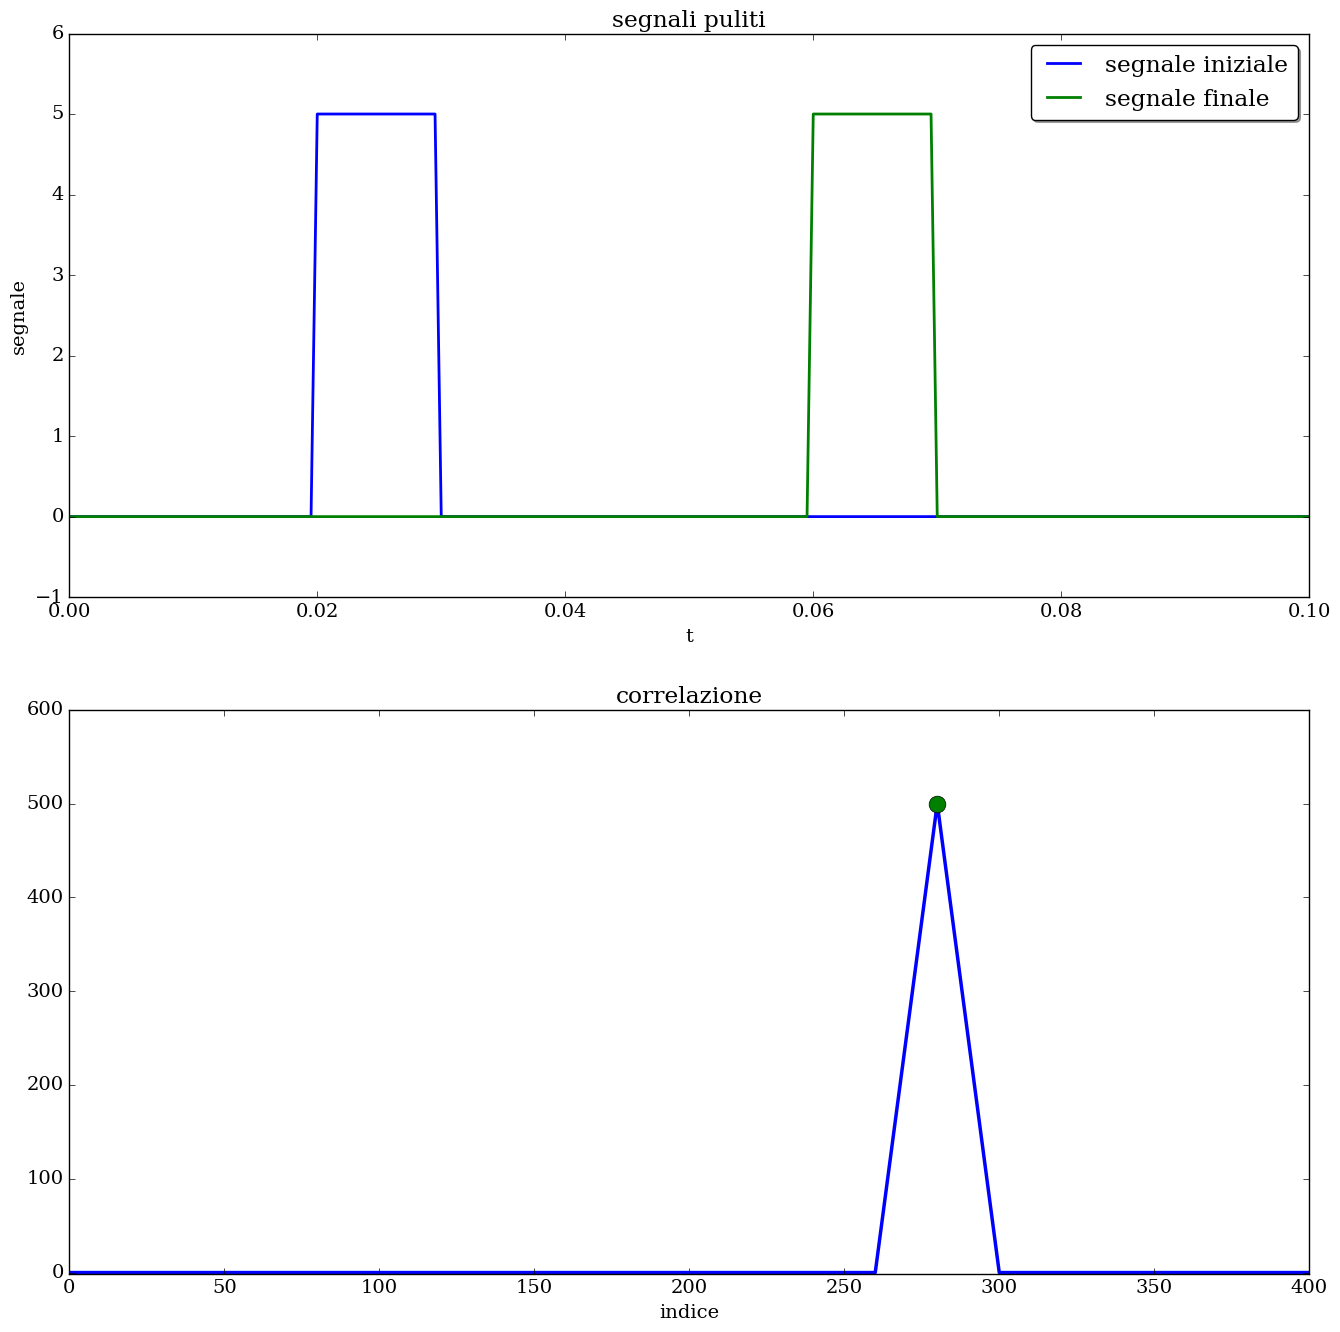

In [45]:
plt.figure(figsize=(16,16), dpi=300)
plt.subplot(211)
plt.plot(t,f1(t),label='segnale iniziale',lw=2.)
plt.plot(t,f2(t),label='segnale finale',lw=2.)
plt.xlim([0,T0])
plt.ylim([-1,6])
plt.xlabel('t')
plt.ylabel('segnale')
plt.title('segnali puliti')
plt.legend(fancybox=True, loc='upper right', shadow=True);
plt.subplot(212)
plt.plot(range(len(correl)),correl,lw=2.5)
plt.plot(maxcorr,correl[maxcorr],'o',ms=12)
plt.xlabel('indice')
plt.title('correlazione')
plt.ylim([-1,600]);

Stima del **lag** tra i segnali:
correlazione *full* è centrata rispetto all'origine, pertanto $t=0$ corrisponde all'indice $\frac{n_{corr}-1}{2}$

In [46]:
lag = (np.argmax(correl)-(len(correl)-1)/2)*dt
print("lag: {0:3.2f}".format(lag))

lag: 0.04


## Segnali con rumore

In [47]:
f3 = lambda t : 5.* (t>=0.06) * (t<0.08)

s1 = f1(t) + np.random.uniform(size=len(t))
s3 = f3(t) + np.random.uniform(size=len(t))

In [48]:
corrN = np.correlate( s3,s1,mode='full')
x_corr = np.array(list(range(len(corrN))))

In [53]:
indN = [corrN>0.93*max(corrN)]

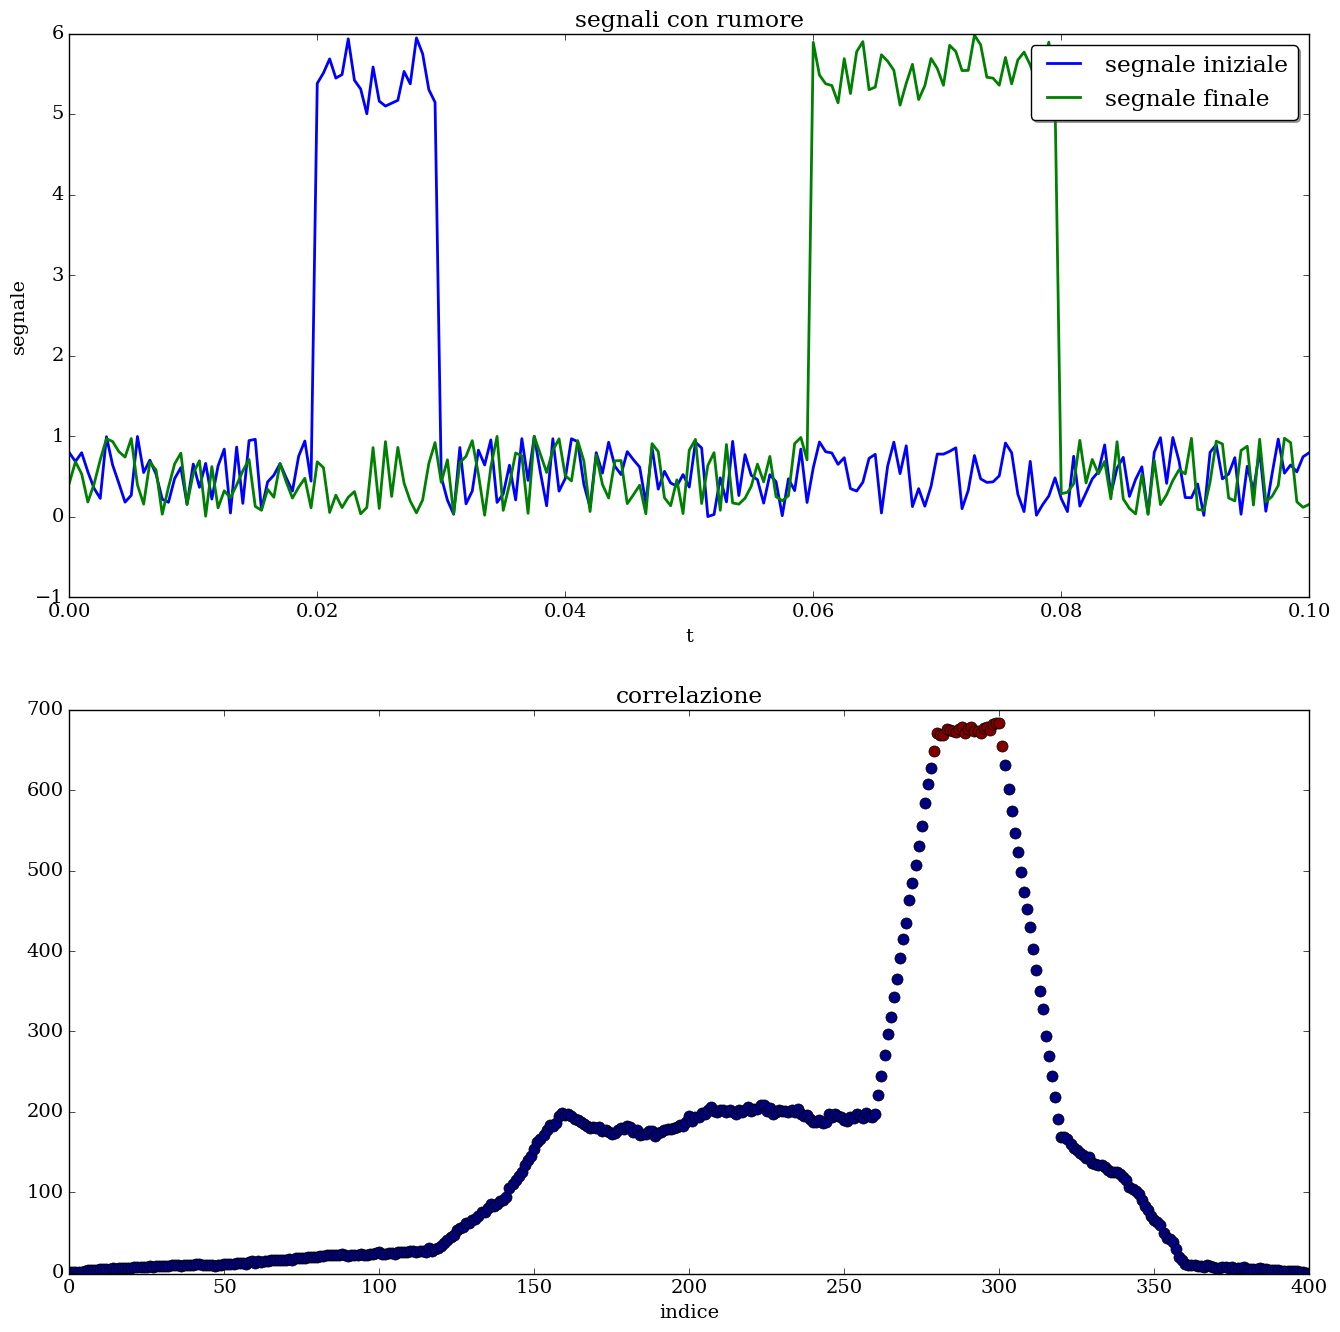

In [54]:
plt.figure(figsize=(16,16), dpi=300)
plt.subplot(211)
plt.plot(t,s1,label='segnale iniziale',lw=2.)
plt.plot(t,s3,label='segnale finale',lw=2.)
plt.xlim([0,T0])
plt.ylim([-1,6])
plt.xlabel('t')
plt.ylabel('segnale')
plt.title('segnali con rumore')
plt.legend(fancybox=True, loc='upper right', shadow=True);
plt.subplot(212)
plt.plot(x_corr[np.logical_not(indN)[0]],corrN[np.logical_not(indN)[0]],ms=8,color=(0.,0.,0.5),marker='o',linestyle='None')
plt.plot(x_corr[indN],corrN[indN],ms=8,color=(0.5,0.,0.),marker='o',linestyle='None')
plt.xlabel('indice')
plt.title('correlazione')
plt.ylim([-1,700]);

In [57]:
lagN = (x_corr[indN]-(len(correl)-1)/2)*dt
print("lag: {0:3.2f}".format(lagN[0]))

lag: 0.04
